In [ ]:
#Please clone the github repository befopre using this colab into /content/drive/MyDrive/KAIR before using this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KAIR

/content/drive/MyDrive/KAIR


In [ ]:
!pip install -r requirement.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

In [ ]:
!python main_train_psnr.py --opt options/swinir/train_swinir_denoising_color.json

In [ ]:
from PIL import Image
import os
import shutil

def convert_to_png(input_folder, output_folder):

    # Get a list of all files in the input folder
    files = os.listdir(input_folder)

    # Loop through each file
    for file in files:
        # Check if the file is a JPEG, JPG, or PNG image
        if file.lower().endswith('.jpg') or file.lower().endswith('.tif') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
            # Open the image
            with Image.open(os.path.join(input_folder, file)) as img:
                # Construct the output file path
                output_file = os.path.splitext(file)[0] + '.png'
                output_path = os.path.join(output_folder, output_file)

                # Convert and save the image
                img.save(output_path, 'PNG')
                print(f"Converted {file} to PNG format.")
        else:
            # If it's not a supported format, just copy the file to the new folder
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, file))
            print(f"Copied {file} as is.")


# Specify the input and output folders
input_folder = '/content/drive/MyDrive/KAIR/testsets/McMasterL'
output_folder = '/content/drive/MyDrive/KAIR/testsets/McMaster_convertedL'
# Convert images to PNG format
convert_to_png(input_folder, output_folder)


Converted 17.tif to PNG format.
Converted 10.tif to PNG format.
Converted 3.tif to PNG format.
Converted 2.tif to PNG format.
Converted 11.tif to PNG format.
Converted 4.tif to PNG format.
Converted 7.tif to PNG format.
Converted 8.tif to PNG format.
Converted 12.tif to PNG format.
Converted 6.tif to PNG format.
Converted 9.tif to PNG format.
Converted 15.tif to PNG format.
Converted 1.tif to PNG format.
Converted 16.tif to PNG format.
Converted 14.tif to PNG format.
Converted 5.tif to PNG format.
Converted 18.tif to PNG format.
Converted 13.tif to PNG format.


In [ ]:
from PIL import Image
import os

# Function to generate LR images
def generate_lr_image(hr_image_path, output_folder, scale_factor):
    hr_image = Image.open(hr_image_path)
    lr_image = hr_image.resize((hr_image.width // scale_factor, hr_image.height // scale_factor), Image.BICUBIC)
    lr_image.save(os.path.join(output_folder, os.path.basename(hr_image_path)))

# Example usage
hr_folder = "/content/drive/MyDrive/KAIR/testsets/CS6777_testset_converted"
lr_folder =  "/content/drive/MyDrive/KAIR/testsets/CS6777_testset_converted_X4"
scale_factor = 4 # Adjust this based on your requirements

# Create LR folder if it doesn't exist
os.makedirs(lr_folder, exist_ok=True)

# Generate LR images for each HR image
for filename in os.listdir(hr_folder):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".ppm"):  # Adjust extensions as needed
        hr_image_path = os.path.join(hr_folder, filename)
        generate_lr_image(hr_image_path, lr_folder, scale_factor)

In [ ]:
!python main_test_swinir.py --task real_sr --model_path /content/drive/MyDrive/KAIR/superresolution/swinir_sr_realworld_x4_psnr/models/100000_G.pth --folder_lq /content/drive/MyDrive/KAIR/testsets/Kodak24 --folder_gt /content/drive/MyDrive/KAIR/testsets/Kodak24L --scale 4 --tile 800

loading model from /content/drive/MyDrive/KAIR/superresolution/swinir_sr_realworld_x4_psnr/models/100000_G.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Traceback (most recent call last):
  File "/content/drive/MyDrive/KAIR/main_test_swinir.py", line 298, in <module>
    main()
  File "/content/drive/MyDrive/KAIR/main_test_swinir.py", line 100, in main
    psnr = util.calculate_psnr(output, img_gt, border=border)
  File "/content/drive/MyDrive/KAIR/utils/utils_image.py", line 631, in calculate_psnr
    raise ValueError('Input images must have the same dimensions.')
ValueError: Input images must have the same dimensions.


In [ ]:
from PIL import Image
import os
import shutil

def convert_to_png(input_folder, output_folder):

    # Get a list of all files in the input folder
    files = os.listdir(input_folder)

    # Loop through each file
    for file in files:
        # Check if the file is a JPEG, JPG, or PNG image
        if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg') or file.lower().endswith('.png'):
            # Open the image
            with Image.open(os.path.join(input_folder, file)) as img:
                # Construct the output file path
                output_file = os.path.splitext(file)[0] + '.png'
                output_path = os.path.join(output_folder, output_file)

                # Convert and save the image
                img.save(output_path, 'PNG')
                print(f"Converted {file} to PNG format.")
        else:
            # If it's not a supported format, just copy the file to the new folder
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, file))
            print(f"Copied {file} as is.")


# Specify the input and output folders
input_folder = '/content/drive/MyDrive/KAIR/testsets/CS6777_Denoising'
output_folder = '/content/drive/MyDrive/KAIR/testsets/CS6777_denoising_converted'
# Convert images to PNG format
convert_to_png(input_folder, output_folder)


Converted denoising2.png to PNG format.
Converted denoising-3-672x357.jpg to PNG format.


In [ ]:
!python main_test_swinir.py --task color_dn --noise 0 --model_path /content/drive/MyDrive/KAIR/denoising_50/swinir_denoising_color_50/models/40000_G.pth --folder_gt testsets/McMaster --folder_gt testsets/McMasterL

loading model from /content/drive/MyDrive/KAIR/denoising_50/swinir_denoising_color_50/models/40000_G.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Testing 0 1                    - PSNR: 15.61 dB; SSIM: 0.2429; PSNR_Y: 20.33 dB; SSIM_Y: 0.3747; PSNR_B: 0.00 dB.
Testing 1 10                   - PSNR: 15.91 dB; SSIM: 0.1287; PSNR_Y: 20.80 dB; SSIM_Y: 0.2531; PSNR_B: 0.00 dB.
Testing 2 11                   - PSNR: 16.26 dB; SSIM: 0.1052; PSNR_Y: 20.86 dB; SSIM_Y: 0.2204; PSNR_B: 0.00 dB.
Testing 3 12                   - PSNR: 15.07 dB; SSIM: 0.1267; PSNR_Y: 19.90 dB; SSIM_Y: 0.2402; PSNR_B: 0.00 dB.
Testing 4 13                   - PSNR: 14.60 dB; SSIM: 0.0808; PSNR_Y: 19.45 dB; SSIM_Y: 0.1722; PSNR_B: 0.00 dB.
Testing 5 14 

In [ ]:
import cv2
import os
import glob

def downscale_image(image, scale_factor):
    height, width = image.shape[:2]
    new_height, new_width = height // scale_factor, width // scale_factor
    downscaled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return downscaled_image

def create_low_quality_images(input_dir, output_dir, scale_factor):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_paths = glob.glob(os.path.join(input_dir, '*'))

    for img_path in image_paths:
        # Read the high-quality image
        img_H = cv2.imread(img_path)
        if img_H is None:
            print(f"Failed to read image: {img_path}")
            continue

        # Downscale the image
        img_L = downscale_image(img_H, scale_factor)

        # Generate the output path
        img_name = os.path.basename(img_path)
        output_path = os.path.join(output_dir, img_name)

        # Save the downscaled image
        cv2.imwrite(output_path, img_L)
        print(f"Saved downscaled image: {output_path}")

# Parameters
input_directory = '/content/drive/MyDrive/KAIR/testsets/Kodak24'  # Path to the folder containing high-resolution images
output_directory = '/content/drive/MyDrive/KAIR/testsets/Kodak24L'  # Path to the folder to save low-resolution images
scale_factor = 4  # Downscaling factor

create_low_quality_images(input_directory, output_directory, scale_factor)


Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim14.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim12.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim15.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim13.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim11.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim18.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim17.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim06.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim03.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim10.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim19.png
Saved downscaled image: /content/drive/MyDrive/KAIR/testsets/Kodak24L/kodim01.png
Saved downscaled

In [ ]:
import os
import cv2
import numpy as np
from glob import glob

def add_noise_to_images(gt_folder, lq_folder, noise_level):
    if not os.path.exists(lq_folder):
        os.makedirs(lq_folder)

    # Get all image paths from the ground truth folder
    gt_images = glob(os.path.join(gt_folder, '*'))

    for idx, img_path in enumerate(gt_images):
        # Read the ground truth image
        img_gt = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32) / 255.0

        # Add Gaussian noise
        np.random.seed(0)
        img_lq = img_gt + np.random.normal(0, noise_level / 255.0, img_gt.shape)

        # Clip the values to ensure they are within [0, 1] range
        img_lq = np.clip(img_lq, 0, 1)

        # Convert the image to uint8 format
        img_lq = (img_lq * 255.0).astype(np.uint8)

        # Get the image name and save the noisy image to the low-quality folder
        img_name = os.path.basename(img_path)
        lq_img_path = os.path.join(lq_folder, img_name)
        cv2.imwrite(lq_img_path, img_lq)

        print(f'Processed {idx + 1}/{len(gt_images)}: {img_name} -> {lq_img_path}')

# Example usage
gt_folder = '/content/drive/MyDrive/KAIR/testsets/McMaster'
lq_folder = '/content/drive/MyDrive/KAIR/testsets/McMasterL'
noise_level = 50  # Noise level in terms of standard deviation (e.g., 25 for 25/255 noise)

add_noise_to_images(gt_folder, lq_folder, noise_level)


Processed 1/18: 17.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/17.tif
Processed 2/18: 10.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/10.tif
Processed 3/18: 3.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/3.tif
Processed 4/18: 2.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/2.tif
Processed 5/18: 11.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/11.tif
Processed 6/18: 4.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/4.tif
Processed 7/18: 7.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/7.tif
Processed 8/18: 8.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/8.tif
Processed 9/18: 12.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/12.tif
Processed 10/18: 6.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/6.tif
Processed 11/18: 9.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/9.tif
Processed 12/18: 15.tif -> /content/drive/MyDrive/KAIR/testsets/McMasterL/15.tif
Processed 13/18: 1.tif -> /content/drive/MyDrive/KA

In [ ]:
psnr_values = [
    (1, 15.61), (10, 15.91), (11, 16.26), (12, 15.07), (13, 14.60),
    (14, 15.59), (15, 16.00), (16, 16.24), (17, 16.16), (18, 15.82),
    (2, 15.86), (3, 15.37), (4, 15.95), (5, 15.17), (6, 15.08),
    (7, 15.41), (8, 16.79), (9, 15.54)
]

# Create a list with the first element of each tuple as index
psnr_indexed = [None] * len(psnr_values)
for idx, value in psnr_values:
    psnr_indexed[idx - 1] = value

print(psnr_indexed)

[15.61, 15.86, 15.37, 15.95, 15.17, 15.08, 15.41, 16.79, 15.54, 15.91, 16.26, 15.07, 14.6, 15.59, 16.0, 16.24, 16.16, 15.82]


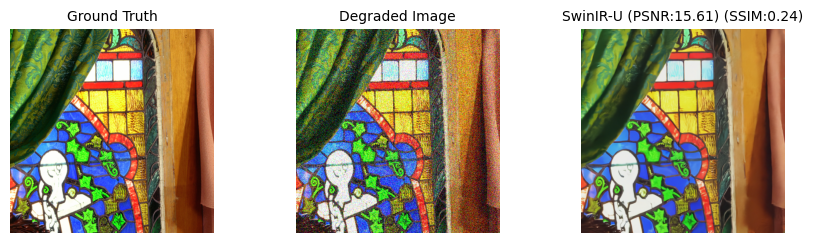

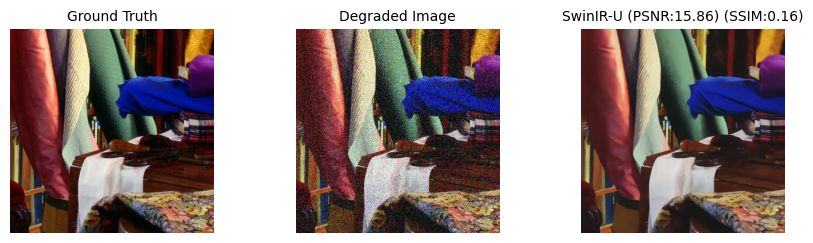

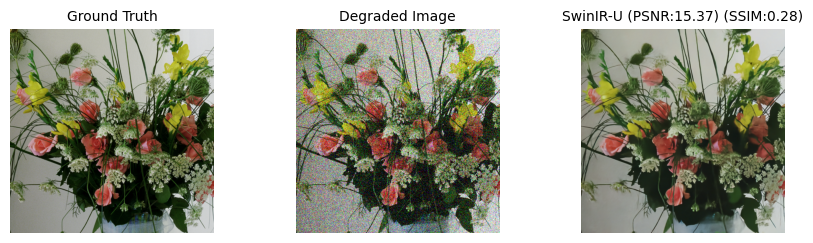

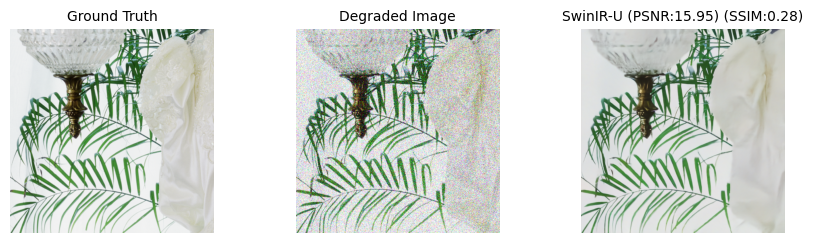

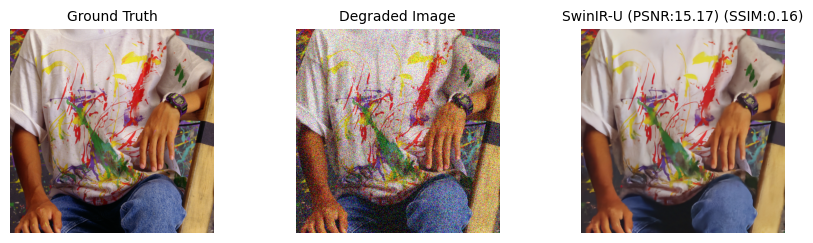

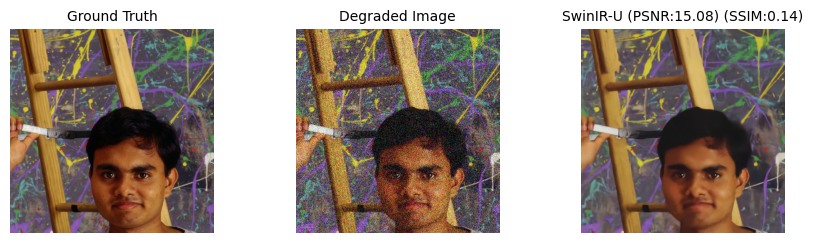

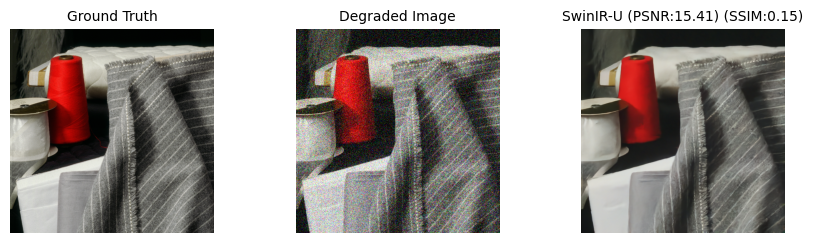

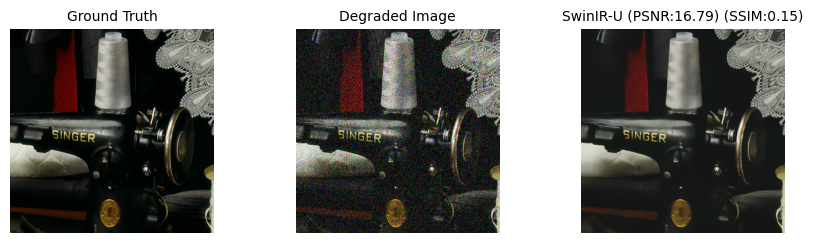

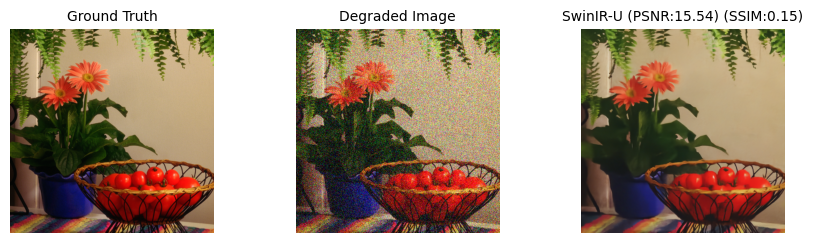

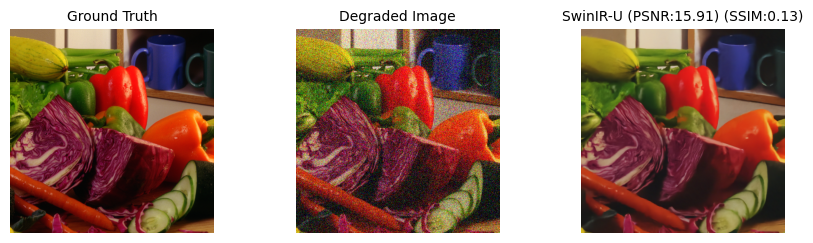

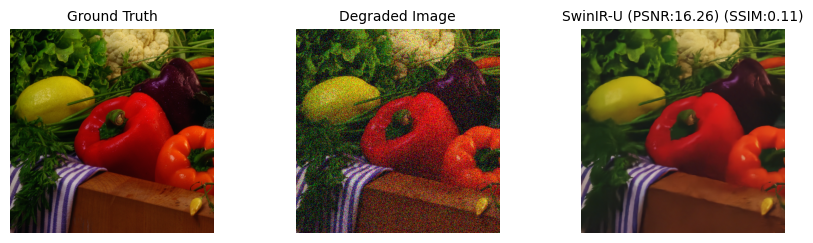

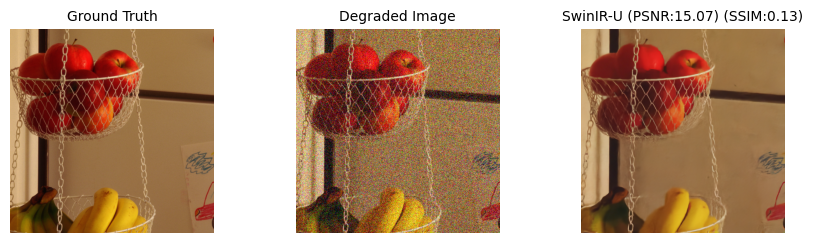

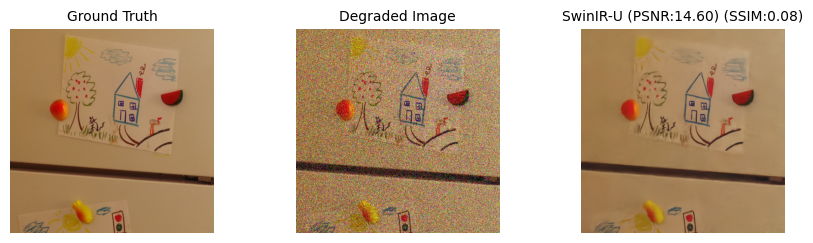

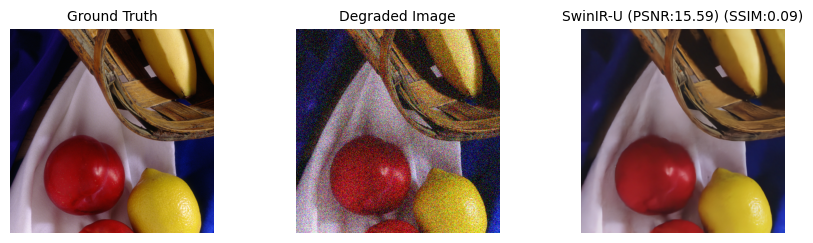

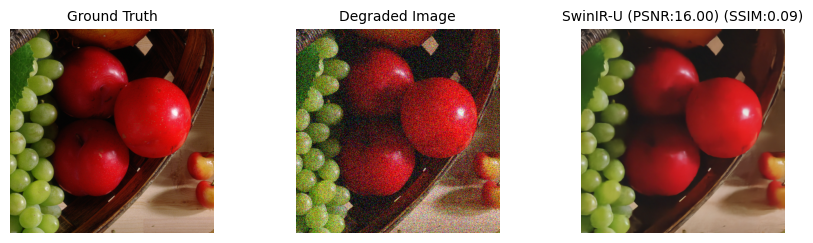

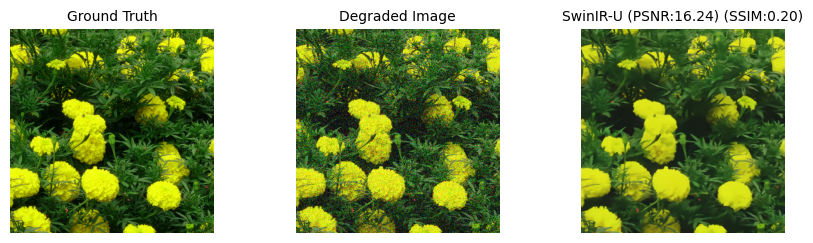

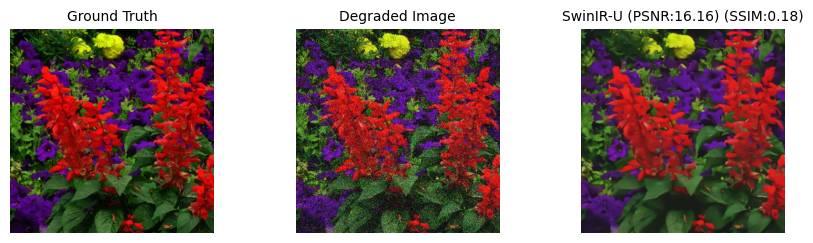

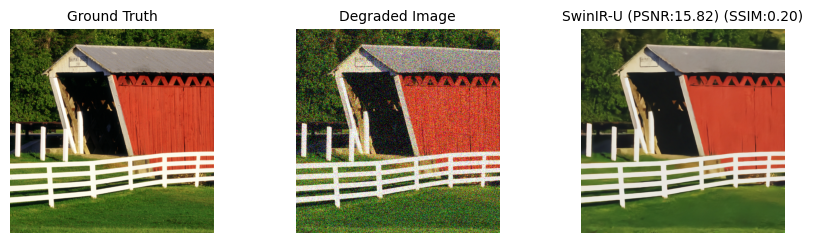

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import glob
import shutil

def display(img1, img2, img3, psnr):
    total_figs = 3
    fig = plt.figure(figsize=(total_figs*12, 14))

    ax1 = fig.add_subplot(1, total_figs, 1)
    plt.title('Ground Truth', fontsize=30)
    ax1.axis('off')
    ax1.imshow(img1)

    ax2 = fig.add_subplot(1, total_figs, 2)
    plt.title('Degraded Image', fontsize=30)
    ax2.axis('off')
    ax2.imshow(img2)

    ax3 = fig.add_subplot(1, total_figs, 3)
    plt.title('SwinIR updated model Output (PSNR: {:.2f})'.format(psnr), fontsize=30)
    ax3.axis('off')
    ax3.imshow(img3)

def imread(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

input_folder = '/content/drive/MyDrive/KAIR/testsets/McMaster_converted'
degraded_folder = '/content/drive/MyDrive/KAIR/testsets/McMaster_convertedL'
output_folder = '/content/drive/MyDrive/KAIR/results/swinir_color_dn_noise0'

input_list = sorted(glob.glob(os.path.join(input_folder, '*.png')), key=lambda x: int(os.path.basename(x)[:-4]))
degraded_list = sorted(glob.glob(os.path.join(degraded_folder, '*.png')), key=lambda x: int(os.path.basename(x)[:-4]))
output_list = sorted(glob.glob(os.path.join(output_folder, '*')), key=lambda x: int(os.path.basename(x).split('_')[0]))

psnr_values = [15.61, 15.86, 15.37, 15.95, 15.17, 15.08, 15.41, 16.79, 15.54, 15.91, 16.26, 15.07, 14.6, 15.59, 16.0, 16.24, 16.16, 15.82]

for input_path, degraded_path, output_path, psnr in zip(input_list, degraded_list, output_list, psnr_values):
    img_input = imread(input_path)
    img_degraded = imread(degraded_path)
    img_output = imread(output_path)

    display(img_input, img_degraded, img_output, psnr)


[15.61, 15.86, 15.37, 15.95, 15.17, 15.08, 15.41, 16.79, 15.54, 15.91, 16.26, 15.07, 14.6, 15.59, 16.0, 16.24, 16.16, 15.82]
